# OpenCVで画像解析+YOLOで物体検出
## PyLadies Caravan in Tomakomai
### この章でやること
- Open CV とは
- 画像編集入門
    - ファイルの読み書き
    - カラースケールの変化
    - 画像のリサイズ・切り抜き
- YOLOによる物体検出
<br>
上記の技術を利用して、下記処理を実装します。

1. 写真から猫を検出する
2. 検出された猫を切り抜く

### この章でやらないこと
NumpyなどのOpenCV以外のライブラリの説明(できる前提で進めます)


# 1. 画像の読み書き

OpenCVでの画像処理は、まず普段皆さんが見ている画像ファイルをOpenCVが処理できる形にするところから始まります。<br>
ファイルを読み込むimread, ファイルを書きだすimwriteはJupyter上でも.pyファイル上でも同じ書き方をしますが、現在処理しているファイルの確認を行う場合は2通りの書き方があります。<br>
今回はJupyterを使用する前提で進めます。<br>
まずは今回使用する画像をJupyter外から確認しましょう<br>
確認できましたか？では先へ進みます

In [2]:
#ライブラリの読み込み
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/Users/kawamura.co.jp/Library/Application Support/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# インライン表示
%matplotlib inline

画像を読み込みます。

In [7]:
print("縦、横、色の種類")
maple.shape

縦、横、色の種類


(3712, 5568, 3)

# 画像情報の取得
maple = cv2.imread("./images/maple.jpg")

画像の大きさを確認します。

In [8]:
# 画像情報の確認
maple.shape

(3712, 5568, 3)

カラーのデジタル画像は、ピクセルごとにRGBの3色（並びについては後述）の強さが指定されています。<br>
8ビットの場合は、各色0-255の256段階の色の強さが割り当てられています。<br>
8ビットモノクロ画像の場合は、0-255の256段階の輝度となります。<br>
感覚をつかむため、今回読み込んだ画像の中身を数字として表示してみましょう。

In [9]:
# 画像の中身を表示してみる
print(maple)

[[[232 236 237]
  [232 236 237]
  [232 236 237]
  ...
  [137 139 140]
  [133 137 138]
  [126 130 131]]

 [[232 236 237]
  [232 236 237]
  [231 235 236]
  ...
  [133 135 136]
  [129 133 134]
  [125 129 130]]

 [[232 236 237]
  [232 236 237]
  [231 235 236]
  ...
  [128 130 131]
  [123 127 128]
  [123 127 128]]

 ...

 [[254 242 232]
  [253 241 231]
  [252 240 230]
  ...
  [ 25  54  93]
  [ 24  53  92]
  [ 24  53  92]]

 [[253 241 231]
  [253 241 231]
  [252 240 230]
  ...
  [ 27  53  93]
  [ 25  52  89]
  [ 23  50  87]]

 [[252 240 230]
  [252 240 230]
  [252 240 230]
  ...
  [ 27  53  93]
  [ 26  53  90]
  [ 25  52  89]]]


画像をそのまま書き出します。指定したディレクトリ（フォルダを指定しない場合は、このnotebookと同じディレクトリ）に画像が作成されたことを確認してください。

In [10]:
# 画像の書き出し
maple2 = cv2.imwrite("maple2.jpg",maple)

# 2. 色モデル変換

画像をいちいち書き出して確認するのが面倒なので、matplotlib.pyplotを利用してJupyter上に表示します。

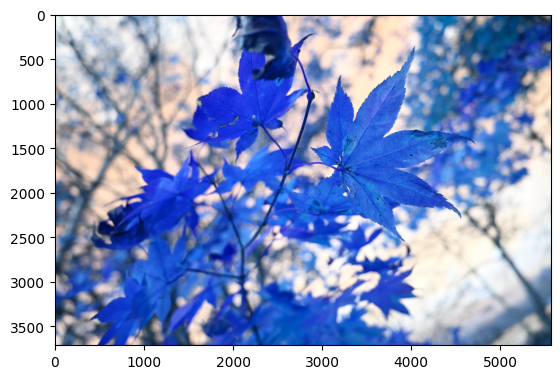

In [11]:
plt.imshow(maple)

Jypyter外から表示した時と違う色で表示されたと思います。<br>
これはOpenCVの標準的な色情報の持ち方と、matplotlibの標準的な色情報の持ち方の違いが原因で起こります。<br>
<br>
通常matplotlibでは <b>R(赤), G(緑), B(青)</b> の順番で情報を保持していますが、<br>
OpenCVでは <b>B(青), G(緑), 赤(R)</b> の順番でデータを保持しています。<br>
<br>
どちらもただの3つの数列であるため、なにも加工しなくても画像情報を読むことができますが、認識する数値と色の組み合わせが異なるため、このような表示のズレが発生します。<br>
具体的には、赤色と青色が反転して表示されてしまいます。<br>
<br>
OpenCVには様々な色相パターンが事前に容易されており、ちょっと書くだけで様々なプリセット色相変換を楽しめます。<br>
もちろんご自身で色モデルを作成しを指定・変換することも可能ですが、少々コードが長くなってしまうことや別途数値計算や各色味の調整に時間がかかってしまうため、今回のハンズオンでは作業しません。<br>
うまく色相変換を利用して、おしゃれ画像加工に挑むことも可能ですよ！<br>
<br>
今回は先ほど正しく表示されなかった画像を正しい色味で表示されるように調整を行いましょう。<br>

## cvtColor
<b>cvtColor : 色モデル間変換を行う。変換する色モデルは定数として事前に容易されている。</b>
cvtColor(【読み込む画像】, 【色相環定数】)

使える色モデル定数例
- COLOR_BGR2GRAY: BGR->グレースケール
- COLOR_BGR2RGB: BGR->RGB (RGB色相環)
- COLOR_BGR2HLS: BGR->HLS (HLS色空間)
- COLOR_BGR2HSV: BGR->HSV (HSV色空間)
- COLOR_BGR2YCrCb: BGR->YCrCb (YUV色空間)
- COLOR_BGR2XYZ: BGR->XYZ (CIE1931色空間)

<br>ここではすべてBGR色モデルからの変換定数ばかりあげているが、もちろんHLSから、HSVからなどさまざまな変換定数が用意されている。

## BGR -> RGB

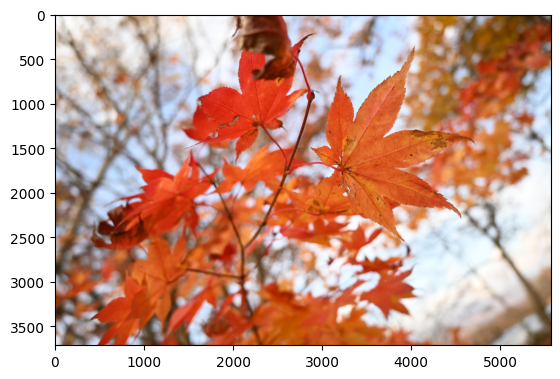

In [27]:
# RGB形式での画像表示
rgb = cv2.cvtColor(maple, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

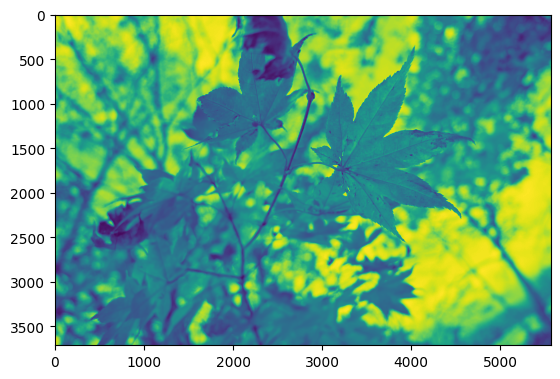

In [23]:
# RGB形式での画像表示
rgb = cv2.cvtColor(maple, cv2.COLOR_BGR2GRAY)
plt.imshow(rgb)

## BGR -> グレースケール

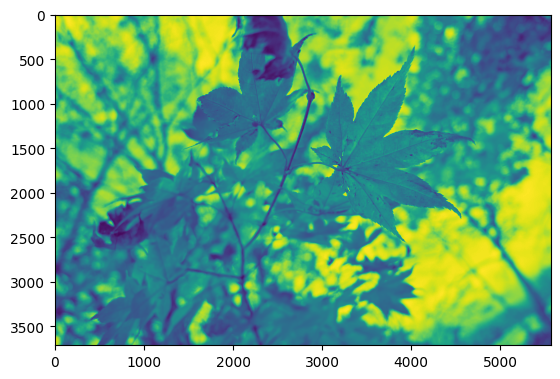

In [19]:
# グレースケール
gray = cv2.cvtColor(maple, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

グレースケール設定をしたのにグレーで表示されませんね？<br>
<br>
これも先ほどお話していたものと同じ原理で、BGRで色味情報を持っているか、RGBで色味情報を持っているかによる色置換の失敗です。<br>
<br>
色味変換(色相変換)を行った際はBGRの順でデータを保持しています。このデータ保持のままで色がグレーに見えるように各値を保持していましたが、RGBで表示させようとしたため、結果緑フォーカスされた画像となってしまいました。

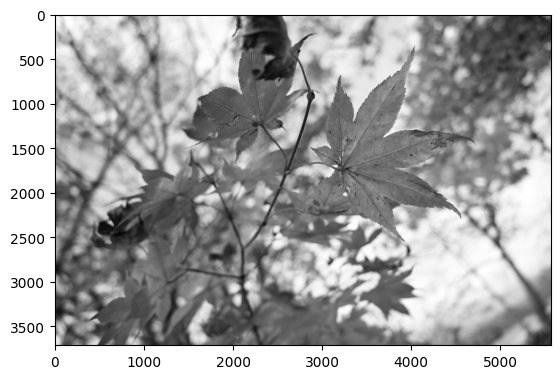

In [20]:
#正しい色味で表示しよう
plt.imshow(gray, cmap='gray')

カラー画像はRGBの3色でしたが、グレースケール画像は1色のみです。

In [24]:
#グレースケール画像の情報確認
gray.shape

(3712, 5568)

In [25]:
#グレースケール画像の書き出し
cv2.imwrite("gray.jpg",gray)

True

# 3. 画像サイズの変更・切り抜き

画像が大きすぎると処理に困ったりしますよね。画像のサイズを変えて色々使いまわしたいタイミングはたくさんあると思います。
<br>
OpenCVでは画像のサイズを変更する場合は下記のように記載します。
<br>
## resize
<b>resize : 画像サイズの変更を行う</b><br>
resize(【読み込む画像】, dsize=【希望の大きさ(width, height)】)

## サイズ変更

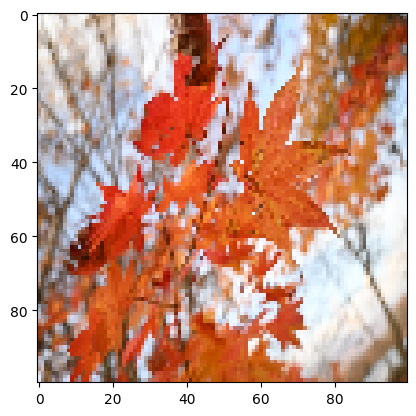

In [28]:
# 画像サイズを小さくしてみよう
# dsize = (width, height) [px] で指定
small = cv2.resize(rgb, dsize=(100,100))

plt.imshow(small)

倍率で縮小する場合は、以下のように書きます。<br>
resize(【読み込む画像】, dsize=None, fx=【横方向の希望の倍率】, fy=【縦方向の希望の倍率】)

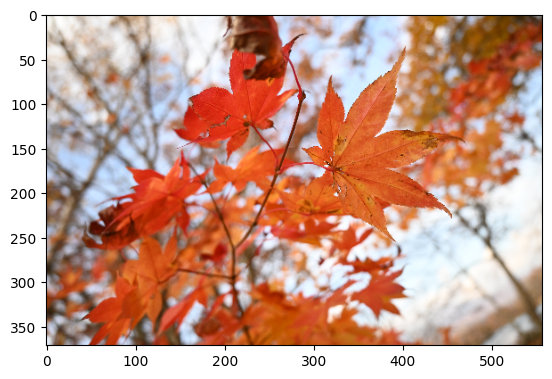

In [29]:
#倍率で縮小
a = 0.1 #倍率の値、fx, fyに入れる

small2 = cv2.resize(rgb, dsize=None, fx=a, fy=a)

plt.imshow(small2)

指定した通りの大きさになっているでしょうか？

In [32]:
# 大きさ確認
print(small2.shape)

rgb.shape

(371, 557, 3)


(3712, 5568, 3)

## 切り抜き

x方向とy方向の範囲を指定すると切り抜けます。<br>
マスクをかけて切り抜く方法もありますが、今回はやりません。

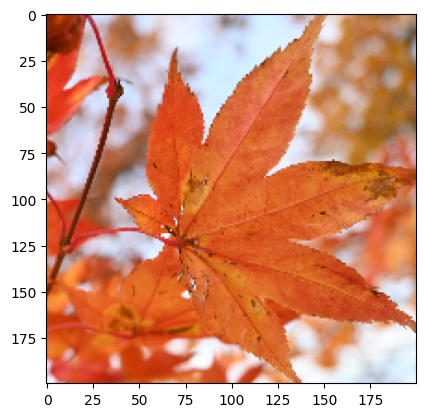

In [33]:
# 切り抜き
# [縦範囲, 横範囲] で切り抜ける
small2_cut = small2[50:250, 250:450]

plt.imshow(small2_cut)

# 4. YOLOで物体検出してみる

YOLOは深層学習による物体検出のモデルです。<br>
YOLOv8のデフォルトのモデルでは80種類の物体が検出できます。<br>
自分で教師データを準備してデフォルトのモデルにない物体を学習させることもできますが、今回はやりません。<br>
今回は画像から猫を検出し、猫の部分だけを切り抜いてみます。

In [34]:
# モデルの読み込み
model = YOLO("yolov8x.pt")

In [35]:
# 検出を行う画像を読み込み
cat = cv2.imread("./images/cat.jpg")

# 検出
results = model.predict(source=cat, save=True, name="cat")


0: 640x480 1 cat, 823.8ms
Speed: 21.0ms preprocess, 823.8ms inference, 13.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/cat


猫が検出されていることが確認できたでしょうか。<br>
猫がバウンディングボックスで囲われた画像が出力されていますが、このボックスの座標を取得してみます。

In [36]:
# 推論結果から座標を表示する
for result in results:
    print("四隅の座標")
    print(result.boxes.xyxy)
    print("確信度")
    print(result.boxes.conf)
    print("種類")
    print(result.boxes.cls)    
    print(result.names)

四隅の座標
tensor([[1127.5531,  881.6655, 2129.8625, 2608.5730]])
確信度
tensor([0.9372])
種類
tensor([15.])
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet

In [37]:
# バウンディングボックスの座標をもとに切り抜く
# 座標を取得
# tensorをlistに変換
result_list = result.boxes.xyxy.tolist()
result_list

[[1127.5531005859375, 881.66552734375, 2129.862548828125, 2608.572998046875]]

In [38]:
x0 = result_list[0][0]
y0 = result_list[0][1]
x1 = result_list[0][2]
y1 = result_list[0][3]

In [39]:
x0

1127.5531005859375

In [40]:
# 切り抜くためにint型にする
x0 = int(x0)
y0 = int(y0)
x1 = int(x1)
y1 = int(y1)

# 表示
print("x0: ", x0)
print("y0: ", y0)
print("x1: ", x1)
print("y1: ", y1)

x0:  1127
y0:  881
x1:  2129
y1:  2608


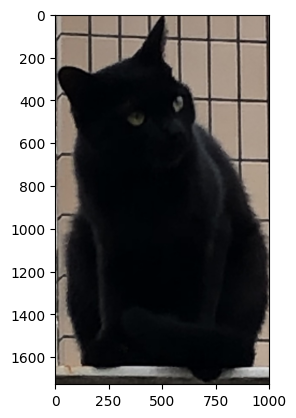

In [43]:
# 切り抜き
# [縦範囲, 横範囲] で切り抜ける
cat_cut = cat[y0:y1,x0:x1]

# RGB形式での画像表示
rgb_cat = cv2.cvtColor(cat_cut, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_cat)

In [45]:
# 切り抜き画像の書き出し
cat2 = cv2.imwrite("cat2.jpg", cat_cut)

ここから先自分のやつ

In [48]:
# 検出を行う画像を読み込み
cat = cv2.imread("./images/hiro_cat.jpg")

# 検出
results = model.predict(source=cat, save=True, name="cat")


0: 384x640 1 person, 2 cats, 2171.4ms
Speed: 57.1ms preprocess, 2171.4ms inference, 19.6ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/cat3


In [51]:
# 検出を行う画像を読み込み
cat = cv2.imread("/Users/kawamura.co.jp/Desktop/cist3au/pyLadies/images/decakiyo.jpg")

# 検出
results = model.predict(source=cat, save=True, name="cat")


0: 544x640 3 persons, 1342.0ms
Speed: 14.6ms preprocess, 1342.0ms inference, 21.2ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/cat3


今回は切り抜いただけですが、例えば動画や連続画像に対してYOLOを適用し、物体の動きをトラッキングする、特定の物体が出てきたフレームのみを抽出するなどの使い方もできます。